## 4th Down Conversions in Football
The possible moves on 4th down are to either go for it, kick a field goal or punt it. In this project we are going to explore field goals and see how field goal distance, roof status, and wind speed affect predicting the field goal result. In order to determine this, the 2023 football season (September 7, 2023 - January 7, 2024) will be leveraged. Ideally this model would be able to tell us whether to kick a field goal or punt the ball. 

To begin, the below packages are imported from sklearn which will be used throughout the project. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model

from sklearn.metrics import (brier_score_loss, precision_score, recall_score)
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV





Now, we are going to import the 2023 NFL regular season data and set it as a variable called pbp_df. This allows us to be able to view the data and use it in code. 

In [2]:
import nfl_data_py

In [3]:
pbp_df = nfl_data_py.import_pbp_data([2023])

2023 done.
Downcasting floats.


In [4]:
pbp_df

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,offense_players,defense_players,n_offense,n_defense,ngs_air_yards,time_to_throw,was_pressure,route,defense_man_zone_type,defense_coverage_type
0,1.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,None,None,None,...,,,0.0,0.0,NaN,NaN,None,None,None,None
1,39.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,00-0035150;00-0037330;00-0036896;00-0033251;00...,00-0036403;00-0038635;00-0036614;00-0039149;00...,11.0,11.0,NaN,NaN,None,None,None,None
2,55.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,00-0037746;00-0031095;00-0036334;00-0034445;00...,00-0035705;00-0035636;00-0036933;00-0036896;00...,11.0,11.0,NaN,NaN,None,None,None,None
3,77.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,00-0037746;00-0031095;00-0036334;00-0034445;00...,00-0035705;00-0035636;00-0036933;00-0034375;00...,11.0,11.0,4.53,2.169,False,HITCH,ZONE_COVERAGE,COVER_3
4,102.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,00-0031095;00-0036334;00-0034445;00-0031260;00...,00-0035705;00-0035636;00-0036933;00-0034375;00...,11.0,11.0,NaN,NaN,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49660,4791.0,2023_22_SF_KC,2024021100,KC,SF,POST,22,KC,home,SF,...,00-0034272;00-0032217;00-0035237;00-0030506;00...,00-0036563;00-0034573;00-0035717;00-0034754;00...,11.0,11.0,NaN,NaN,None,None,None,None
49661,4813.0,2023_22_SF_KC,2024021100,KC,SF,POST,22,KC,home,SF,...,00-0034386;00-0032217;00-0035237;00-0030506;00...,00-0036563;00-0034573;00-0035717;00-0034754;00...,11.0,11.0,NaN,NaN,None,None,None,None
49662,4835.0,2023_22_SF_KC,2024021100,KC,SF,POST,22,KC,home,SF,...,00-0034272;00-0034386;00-0032217;00-0035237;00...,00-0036563;00-0034573;00-0036260;00-0035717;00...,11.0,11.0,-3.17,2.069,False,SCREEN,ZONE_COVERAGE,COVER_4
49663,4860.0,2023_22_SF_KC,2024021100,KC,SF,POST,22,KC,home,SF,...,00-0034272;00-0032217;00-0035237;00-0030506;00...,00-0036563;00-0034573;00-0036260;00-0035717;00...,11.0,11.0,1.41,2.236,False,FLAT,MAN_COVERAGE,COVER_0


In order to determine the columns that will be used in the project, we are going view a list of all of them. 

In [5]:
#To see the columns in the dataset
for col in pbp_df.columns:
    print(col)

play_id
game_id
old_game_id
home_team
away_team
season_type
week
posteam
posteam_type
defteam
side_of_field
yardline_100
game_date
quarter_seconds_remaining
half_seconds_remaining
game_seconds_remaining
game_half
quarter_end
drive
sp
qtr
down
goal_to_go
time
yrdln
ydstogo
ydsnet
desc
play_type
yards_gained
shotgun
no_huddle
qb_dropback
qb_kneel
qb_spike
qb_scramble
pass_length
pass_location
air_yards
yards_after_catch
run_location
run_gap
field_goal_result
kick_distance
extra_point_result
two_point_conv_result
home_timeouts_remaining
away_timeouts_remaining
timeout
timeout_team
td_team
td_player_name
td_player_id
posteam_timeouts_remaining
defteam_timeouts_remaining
total_home_score
total_away_score
posteam_score
defteam_score
score_differential
posteam_score_post
defteam_score_post
score_differential_post
no_score_prob
opp_fg_prob
opp_safety_prob
opp_td_prob
fg_prob
safety_prob
td_prob
extra_point_prob
two_point_conversion_prob
ep
epa
total_home_epa
total_away_epa
total_home_rush_epa


After reviewing the columns, we are going to make a smaller dataset called fg_dt (field goal data frame) with columns that can be used in our model. The columns included will be game_id, game_date, drive, yardline_100, filed_goal_result, field_goal_attempt, kick_distance, roof, surface, temp, wind, game_seconds_remaining, and time. Since we only want data where there was a field goal attempt, we are going to filter the field goal attempt column to true (value = 1) and call that dataset filtered_df

In [6]:
fg_df = pbp_df[["game_id", "game_date", "drive","yardline_100","field_goal_result", "field_goal_attempt","kick_distance", "roof", "surface", "temp", "wind", "game_seconds_remaining", "time"]]

fg_df

,game_id,game_date,drive,yardline_100,field_goal_result,field_goal_attempt,kick_distance,roof,surface,temp,wind,game_seconds_remaining,time
0,2023_01_ARI_WAS,2023-09-10,NaN,NaN,None,NaN,NaN,outdoors,,NaN,NaN,3600.0,15:00
1,2023_01_ARI_WAS,2023-09-10,1.0,35.0,None,0.0,65.0,outdoors,,NaN,NaN,3600.0,15:00
2,2023_01_ARI_WAS,2023-09-10,1.0,75.0,None,0.0,NaN,outdoors,,NaN,NaN,3600.0,15:00
3,2023_01_ARI_WAS,2023-09-10,1.0,72.0,None,0.0,NaN,outdoors,,NaN,NaN,3570.0,14:30
4,2023_01_ARI_WAS,2023-09-10,1.0,66.0,None,0.0,NaN,outdoors,,NaN,NaN,3535.0,13:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49660,2023_22_SF_KC,2024-02-11,26.0,32.0,None,0.0,NaN,dome,grass,NaN,NaN,127.0,02:07
49661,2023_22_SF_KC,2024-02-11,26.0,13.0,None,0.0,NaN,dome,grass,NaN,NaN,86.0,01:26
49662,2023_22_SF_KC,2024-02-11,26.0,10.0,None,0.0,NaN,dome,grass,NaN,NaN,50.0,00:50
49663,2023_22_SF_KC,2024-02-11,26.0,3.0,None,0.0,NaN,dome,grass,NaN,NaN,6.0,00:06


In [7]:
filtered_df = fg_df[fg_df['field_goal_attempt'] == 1]

In [8]:
filtered_df

,game_id,game_date,drive,yardline_100,field_goal_result,field_goal_attempt,kick_distance,roof,surface,temp,wind,game_seconds_remaining,time
36,2023_01_ARI_WAS,2023-09-10,4.0,11.0,made,1.0,28.0,outdoors,,NaN,NaN,2756.0,00:56
46,2023_01_ARI_WAS,2023-09-10,6.0,36.0,made,1.0,54.0,outdoors,,NaN,NaN,2611.0,13:31
89,2023_01_ARI_WAS,2023-09-10,12.0,12.0,made,1.0,30.0,outdoors,,NaN,NaN,1803.0,00:03
102,2023_01_ARI_WAS,2023-09-10,13.0,19.0,made,1.0,37.0,outdoors,,NaN,NaN,1512.0,10:12
156,2023_01_ARI_WAS,2023-09-10,22.0,15.0,made,1.0,33.0,outdoors,,NaN,NaN,146.0,02:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49565,2023_22_SF_KC,2024-02-11,16.0,39.0,made,1.0,57.0,dome,grass,NaN,NaN,1206.0,05:06
49605,2023_22_SF_KC,2024-02-11,21.0,6.0,made,1.0,24.0,dome,grass,NaN,NaN,349.0,05:49
49613,2023_22_SF_KC,2024-02-11,22.0,35.0,made,1.0,53.0,dome,grass,NaN,NaN,117.0,01:57
49627,2023_22_SF_KC,2024-02-11,23.0,11.0,made,1.0,29.0,dome,grass,NaN,NaN,6.0,00:06


Now that the dataset is smaller and filtered to only field goal attempts called, we are going to look at the values in some of the columns to have a better understanding of the data. We will also look to see how many missing values are in each column because they can impact our results. 

In [9]:
list(set(filtered_df['field_goal_result']))

['missed', 'made', 'blocked']

In [10]:
list(set(filtered_df['roof']))

['dome', 'outdoors', 'open', 'closed']

In [11]:
list(set(filtered_df['surface']))

['', 'grass', 'sportturf', 'fieldturf', 'matrixturf', 'astroturf', 'a_turf']

In [12]:
# Tells us the amount of missing values that are in the dataset when the roof is equal to dome
filtered_df[filtered_df["roof"]=="dome"].isnull().sum()

game_id                     0
game_date                   0
drive                       0
yardline_100                0
field_goal_result           0
field_goal_attempt          0
kick_distance               0
roof                        0
surface                     0
temp                      204
wind                      204
game_seconds_remaining      0
time                        0
dtype: int64

After reviewing the data, it is now time to make a dataset that will be used in our model. The new dataset will be called model_df, which includes game_id, game_date, yardline_100, field_goal_result, field_goal_attempt, kick_distance, roof, surface, temp, wind, game_seconds_remaining, and time. 

In [13]:
model_df = filtered_df[["game_id", "game_date","yardline_100","field_goal_result", "field_goal_attempt","kick_distance", "roof", "surface", "temp", "wind", "game_seconds_remaining", "time"]]  
model_df

,game_id,game_date,yardline_100,field_goal_result,field_goal_attempt,kick_distance,roof,surface,temp,wind,game_seconds_remaining,time
36,2023_01_ARI_WAS,2023-09-10,11.0,made,1.0,28.0,outdoors,,NaN,NaN,2756.0,00:56
46,2023_01_ARI_WAS,2023-09-10,36.0,made,1.0,54.0,outdoors,,NaN,NaN,2611.0,13:31
89,2023_01_ARI_WAS,2023-09-10,12.0,made,1.0,30.0,outdoors,,NaN,NaN,1803.0,00:03
102,2023_01_ARI_WAS,2023-09-10,19.0,made,1.0,37.0,outdoors,,NaN,NaN,1512.0,10:12
156,2023_01_ARI_WAS,2023-09-10,15.0,made,1.0,33.0,outdoors,,NaN,NaN,146.0,02:26
...,...,...,...,...,...,...,...,...,...,...,...,...
49565,2023_22_SF_KC,2024-02-11,39.0,made,1.0,57.0,dome,grass,NaN,NaN,1206.0,05:06
49605,2023_22_SF_KC,2024-02-11,6.0,made,1.0,24.0,dome,grass,NaN,NaN,349.0,05:49
49613,2023_22_SF_KC,2024-02-11,35.0,made,1.0,53.0,dome,grass,NaN,NaN,117.0,01:57
49627,2023_22_SF_KC,2024-02-11,11.0,made,1.0,29.0,dome,grass,NaN,NaN,6.0,00:06


In the above dataset there are some NaN (missing) values in the temp and wind columns. Given wind typically has an impact on field goals, we are going to replace the NaN values with either 0 or the average wind speed. The wind speed will be 0 for NaN values that correspond to a roof that is closed or a dome and average wind speed for NaN values with the other roof options. The reason 0 is used for closed or dome is because there is no wind in those stadiums. Since wind speeds can vary in outdoor stadiums, the average wind speed for this dataset which is 8.02mph will be leveraged.

In [14]:
#To find the average wind speed, we must drop the NA values
wind_model_df = model_df.dropna(how = "any")
average_wind = sum(wind_model_df['wind'])/len(wind_model_df['wind'])

In [15]:
print (average_wind)

8.01858108108108


In [16]:
values = {'wind':average_wind}
values

{'wind': 8.01858108108108}

In [17]:
#Fill in NAs with average wind speed
#model_df = model_df.fillna(value = values)  this code is to make all values in the wind column the average wind speed
model_df['wind'] = [0 if roof in ['dome', 'closed'] and pd.isnull(wind) else values['wind'] if pd.isnull(wind) else wind for roof,wind in zip(model_df['roof'],model_df['wind'])]
model_df

C:\Users\AGaev\AppData\Local\Temp\ipykernel_54228\1349688497.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['wind'] = [0 if roof in ['dome', 'closed'] and pd.isnull(wind) else values['wind'] if pd.isnull(wind) else wind for roof,wind in zip(model_df['roof'],model_df['wind'])]


,game_id,game_date,yardline_100,field_goal_result,field_goal_attempt,kick_distance,roof,surface,temp,wind,game_seconds_remaining,time
36,2023_01_ARI_WAS,2023-09-10,11.0,made,1.0,28.0,outdoors,,NaN,8.018581,2756.0,00:56
46,2023_01_ARI_WAS,2023-09-10,36.0,made,1.0,54.0,outdoors,,NaN,8.018581,2611.0,13:31
89,2023_01_ARI_WAS,2023-09-10,12.0,made,1.0,30.0,outdoors,,NaN,8.018581,1803.0,00:03
102,2023_01_ARI_WAS,2023-09-10,19.0,made,1.0,37.0,outdoors,,NaN,8.018581,1512.0,10:12
156,2023_01_ARI_WAS,2023-09-10,15.0,made,1.0,33.0,outdoors,,NaN,8.018581,146.0,02:26
...,...,...,...,...,...,...,...,...,...,...,...,...
49565,2023_22_SF_KC,2024-02-11,39.0,made,1.0,57.0,dome,grass,NaN,0.000000,1206.0,05:06
49605,2023_22_SF_KC,2024-02-11,6.0,made,1.0,24.0,dome,grass,NaN,0.000000,349.0,05:49
49613,2023_22_SF_KC,2024-02-11,35.0,made,1.0,53.0,dome,grass,NaN,0.000000,117.0,01:57
49627,2023_22_SF_KC,2024-02-11,11.0,made,1.0,29.0,dome,grass,NaN,0.000000,6.0,00:06


In [18]:
model_df["roof_status"] = [1 if x in ["outdoors", "open"] else 0 for x in model_df["roof"]]

The next step is to index the field_goal_result column in our model_df dataset. In this case, 0 corresponds to blocked or missed and 1 corresponds to made. After that, the x and y variables are defined. 

In [19]:
#Index field_goal_result
model_df = model_df[model_df["field_goal_result"].isin(["made", "blocked", "missed"])]
model_df["field_goal_result"] = [0 if x == "blocked" 
                                  else 0 if x == "missed" 
                                  else 1 if x == "made" 
                                  else 0 for x in model_df["field_goal_result"]]

In [20]:
#Define Variables
X = model_df[["kick_distance", "roof_status", "wind"]]
y = model_df[["field_goal_result"]]

In [21]:
print(X)

       kick_distance  roof_status      wind
36              28.0            1  8.018581
46              54.0            1  8.018581
89              30.0            1  8.018581
102             37.0            1  8.018581
156             33.0            1  8.018581
...              ...          ...       ...
49565           57.0            0  0.000000
49605           24.0            0  0.000000
49613           53.0            0  0.000000
49627           29.0            0  0.000000
49647           27.0            0  0.000000

[1107 rows x 3 columns]


Now, the data will be split between a training, test, and validation set, with 75% of the data being allocated to the training set. The remaining 25% of the data will be split evenly between the test and validation set. Additionally, the random_state code keeps the randomization consistent every time the code is ran which will prevent the results from changing.

In [22]:
# Split the data into training, validation and test sets: 75% of the data is for training
#random_state keeps the randomization consistent everytime the code is ran. So the groupings stay the same
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.25, random_state = 1)

In [23]:
X_test, X_val, y_test, y_val  = train_test_split(X_test, y_test, test_size=0.5, random_state = 1)

The first model type that will be tested is logistic regression because there are multiple x variables, and it has the binary classification of field goal made or not.  Below the coefficients for each of the x variables are displayed. -0.108 for kick distance, 0.240 for roof status, and -0.026 for wind. For kick distance, the negative value means that as distance increases, the chance of making the field goal decreases. The same is true for wind, as wind speeds increase, the chance of making the field goal decreases. For roof status, the coefficient is positive since the stadium being enclosed increases the chance of making the field goal. 

In [24]:
regr = LogisticRegression()
# regr.fit(np.array(X_train).reshape(-1,1), y_train) use this one when there is only 1 feature in x
regr.fit(X_train, y_train)
print(regr.coef_)

[[-0.1051322   0.39442755 -0.02973256]]


C:\Users\AGaev\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
print(regr.intercept_)

[6.25157561]


Describe what preds_test is

In [26]:
#preds_test is an array with the probabilities of each event for every data point within X_test
# reshape(-1,1) reads it in column form not row form
# preds_test = regr.predict_proba(np.array(X_test).reshape(-1,1))  use this one when there is only 1 feature in x
preds_test = regr.predict_proba(X_test)
preds_test

array([[0.04115074, 0.95884926],
       [0.04488576, 0.95511424],
       [0.0746267 , 0.9253733 ],
       [0.03359165, 0.96640835],
       [0.12167579, 0.87832421],
       [0.29611468, 0.70388532],
       [0.04750521, 0.95249479],
       [0.16996723, 0.83003277],
       [0.03775169, 0.96224831],
       [0.09949443, 0.90050557],
       [0.03189145, 0.96810855],
       [0.38478085, 0.61521915],
       [0.26609398, 0.73390602],
       [0.11853382, 0.88146618],
       [0.03074969, 0.96925031],
       [0.04550502, 0.95449498],
       [0.03775169, 0.96224831],
       [0.51408537, 0.48591463],
       [0.02077317, 0.97922683],
       [0.05564492, 0.94435508],
       [0.02947846, 0.97052154],
       [0.02434839, 0.97565161],
       [0.05278269, 0.94721731],
       [0.01791745, 0.98208255],
       [0.26032809, 0.73967191],
       [0.05181298, 0.94818702],
       [0.06134334, 0.93865666],
       [0.38478085, 0.61521915],
       [0.08098387, 0.91901613],
       [0.03725364, 0.96274636],
       [0.

In [27]:
# Column 1 is probability of not making a field goal and column 2 is probability of making a field goal
# Add in evaluation through log loss, visualize the output
#probability as a function of distance
# try adding wind as a feature. Need to use average wind speed for total 2023 season missing values. Can make the average more granualr later on
# Compare the 2 variable to the 3 variable model. evaluate with calibration curve and log loss. Then see if a fourth variable impacts the model. Possible next step is calibration curve for one feature (for example distance). Graph of the logistic regression curve

## Calibration Curves

The next step is to create a calibration curve for the model. We are going to look at the positive event of making a field goal which we did by indexing preds to the success columnn (preds [:,1]). 

In [28]:
#Calibration Curve for Each Event
def plot_calibration_curve(y_test, preds):
    """ This function ingests a target variable
    and predicted probabilities to generate
    a calibration cure

    @param y_test: This list contains the multiclass target
      for our model
    @param target_class: Integer corresponding to one target
       in the y_test list
    @param preds: Numpy array of predicted probabilities for
       each target class in y_test
    
    Returns:
    
       -fig: Matplotlib object calibration curve
    """
    
    # Initialize visualizaton
    fig = plt.figure(1, figsize=(10, 10))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)

    fraction_of_positives, mean_predicted_value = \
    calibration_curve(y_test, preds [:,1], n_bins=10)
    ax1.plot(mean_predicted_value, fraction_of_positives, "s-")
    ax1.set_xlabel("Predicted Frequency")
    ax1.set_ylabel("Observed Frequency")
    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

    plt.close ()
    
    return fig

In [29]:
#Calibration curve for the positive event of making a field goal. In the above function we indexed preds to the success column (preds [:,1])
fig_list = []
fig = plot_calibration_curve(y_test = y_test, preds = preds_test)
fig_list.append(fig)

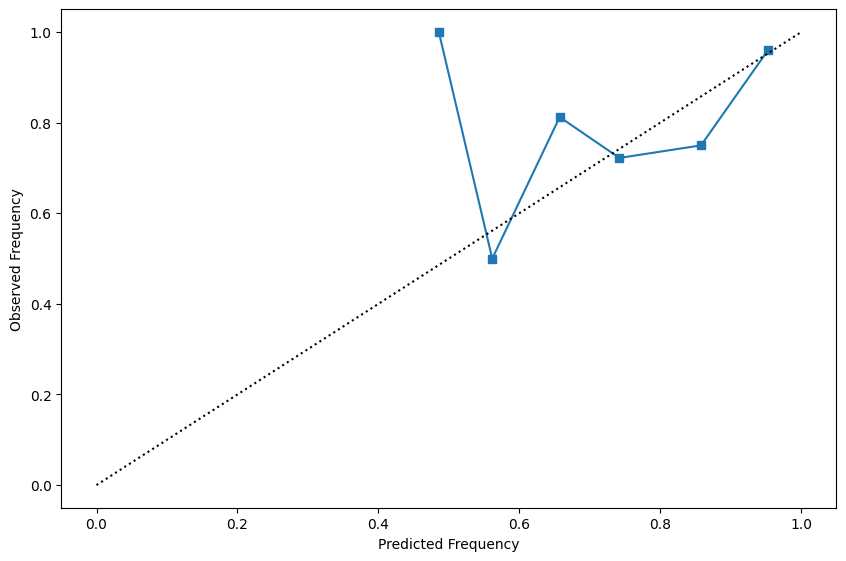

In [30]:
fig

In [31]:
y_test

,field_goal_result
5595,1
8099,1
102,1
48441,1
41678,1
...,...
35380,1
13247,1
20556,1
3181,0


In [32]:
pred_df = pd.DataFrame({"target":y_test["field_goal_result"], "distance":X_test["kick_distance"], "preds":preds_test[:,1]})
pred_df

,target,distance,preds
5595,1,31.0,0.958849
8099,1,33.0,0.955114
102,1,37.0,0.925373
48441,1,29.0,0.966408
41678,1,43.0,0.878324
...,...,...,...
35380,1,33.0,0.953822
13247,1,26.0,0.974543
20556,1,30.0,0.951964
3181,0,43.0,0.868402


In [33]:
imperical_df = pred_df.groupby("distance")["target"].agg(["mean","count"])
imperical_df

,mean,count
distance,,
21.0,1.000000,1
23.0,1.000000,4
24.0,1.000000,4
25.0,1.000000,4
26.0,0.666667,3
27.0,1.000000,6
28.0,1.000000,3
29.0,1.000000,4
30.0,1.000000,6


In [34]:
predicted_df = pred_df.groupby("distance")["preds"].agg(["mean","count"])
predicted_df.merge(imperical_df,on= "distance")

,mean_x,count_x,mean_y,count_y
distance,,,,
21.0,0.982398,1,1.000000,1
23.0,0.980327,4,1.000000,4
24.0,0.979220,4,1.000000,4
25.0,0.976373,4,1.000000,4
26.0,0.974990,3,0.666667,3
27.0,0.970656,6,1.000000,6
28.0,0.966639,3,1.000000,3
29.0,0.962918,4,1.000000,4
30.0,0.961528,6,1.000000,6


(array([ 0.,  0.,  0.,  0.,  1.,  2., 16., 18., 24., 77.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 [<matplotlib.patches.Polygon at 0x1d1d550de10>])

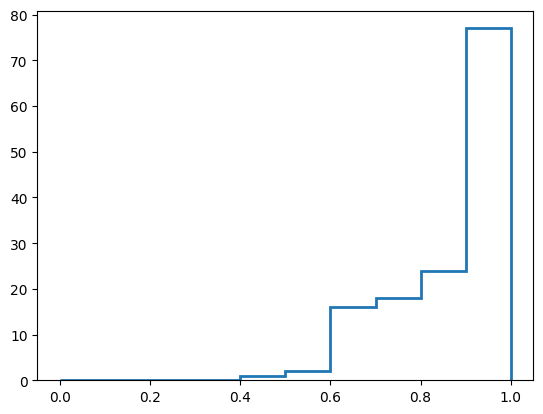

In [35]:
plt.hist(pred_df["preds"], range=(0, 1), bins=10, label='Model', histtype= "step", lw=2)

In [36]:
#Log Loss.  The lower log loss number is better because it means there is less variance.
log_loss(y_test, preds_test)

0.3459034581966402

In [37]:
pred_df = pd.DataFrame({"target":y_test["field_goal_result"], "distance":X_test["kick_distance"], "preds":preds_test[:,1]})
pred_df

,target,distance,preds
5595,1,31.0,0.958849
8099,1,33.0,0.955114
102,1,37.0,0.925373
48441,1,29.0,0.966408
41678,1,43.0,0.878324
...,...,...,...
35380,1,33.0,0.953822
13247,1,26.0,0.974543
20556,1,30.0,0.951964
3181,0,43.0,0.868402


In [38]:
imperical_df = pred_df.groupby("distance")["target"].agg(["mean","count"])
imperical_df

,mean,count
distance,,
21.0,1.000000,1
23.0,1.000000,4
24.0,1.000000,4
25.0,1.000000,4
26.0,0.666667,3
27.0,1.000000,6
28.0,1.000000,3
29.0,1.000000,4
30.0,1.000000,6


In [39]:
predicted_df = pred_df.groupby("distance")["preds"].agg(["mean","count"])
predicted_df.merge(imperical_df,on= "distance")
predicted_df = predicted_df.merge(imperical_df,on= "distance")

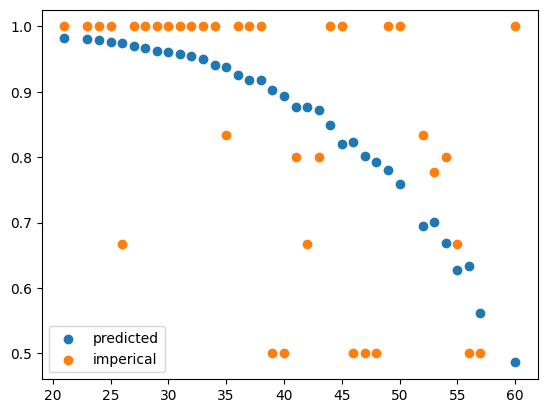

In [40]:
plt.scatter(predicted_df.index.values, predicted_df['mean_x'], label='predicted')
plt.scatter(predicted_df.index.values, predicted_df['mean_y'], label='imperical')
plt.legend()

## Random Forest

In [41]:
#n_estimator is the number of trees in the forest. For example 250. Increasing the number of tree typically increases the success of the model but it has dimineshing returns
random_forest = RandomForestClassifier(n_estimators=250, min_samples_leaf=50, max_depth=5)
random_forest.fit(X_train, y_train)

C:\Users\AGaev\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=5, min_samples_leaf=50, n_estimators=250)

In [42]:
# feature that minimizes the gini index. When splitting, launch angles makes up roughly 2/3 of importance when minimizing the gini index
random_forest.feature_importances_

array([0.91228049, 0.01183045, 0.07588906])

In [43]:
rf_test_df = pd.DataFrame({"kick_distance": [36], "roof_status": [1], "wind": [10]})
rf_test_df

,kick_distance,roof_status,wind
0,36,1,10


In [44]:
random_forest.predict_proba(rf_test_df)

array([[0.092385, 0.907615]])

In [45]:
rf_preds_test = random_forest.predict_proba(X_test)
rf_preds_test

array([[0.04320218, 0.95679782],
       [0.04824453, 0.95175547],
       [0.06621773, 0.93378227],
       [0.06046784, 0.93953216],
       [0.1349497 , 0.8650503 ],
       [0.25631212, 0.74368788],
       [0.07869593, 0.92130407],
       [0.22502674, 0.77497326],
       [0.04873614, 0.95126386],
       [0.10978285, 0.89021715],
       [0.03522629, 0.96477371],
       [0.32499714, 0.67500286],
       [0.23616762, 0.76383238],
       [0.13295202, 0.86704798],
       [0.0708241 , 0.9291759 ],
       [0.04512461, 0.95487539],
       [0.04873614, 0.95126386],
       [0.32499714, 0.67500286],
       [0.03056961, 0.96943039],
       [0.06217551, 0.93782449],
       [0.05877269, 0.94122731],
       [0.06054787, 0.93945213],
       [0.04017214, 0.95982786],
       [0.03011001, 0.96988999],
       [0.2370049 , 0.7629951 ],
       [0.05787036, 0.94212964],
       [0.0623919 , 0.9376081 ],
       [0.32499714, 0.67500286],
       [0.09720921, 0.90279079],
       [0.05317341, 0.94682659],
       [0.

## Calibration Curve

In [46]:
#Calibration curve for the positive event of making a field goal.
fig_list = []
fig = plot_calibration_curve(y_test = y_test, preds = rf_preds_test)
fig_list.append(fig)

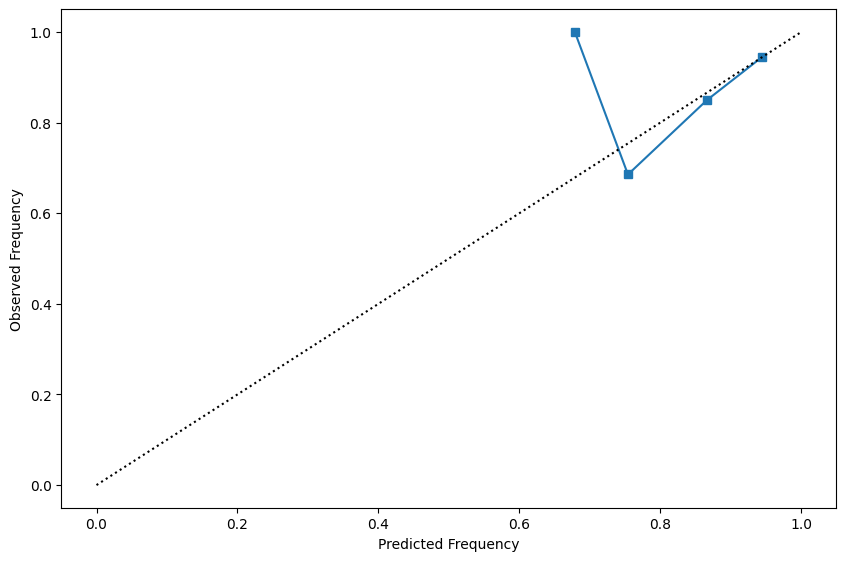

In [47]:
fig

In [48]:
#Log Loss.  The lower log loss number is better because it means there is less variance.
log_loss(y_test, rf_preds_test)

0.3583752216788241

In [49]:
rf_pred_df = pd.DataFrame({"target":y_test["field_goal_result"], "distance":X_test["kick_distance"], "preds":rf_preds_test[:,1]})
rf_pred_df

,target,distance,preds
5595,1,31.0,0.956798
8099,1,33.0,0.951755
102,1,37.0,0.933782
48441,1,29.0,0.939532
41678,1,43.0,0.865050
...,...,...,...
35380,1,33.0,0.950144
13247,1,26.0,0.972624
20556,1,30.0,0.923605
3181,0,43.0,0.841663


(array([ 0.,  0.,  0.,  0.,  0.,  0., 10., 35., 20., 73.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 [<matplotlib.patches.Polygon at 0x1d1d9c43010>])

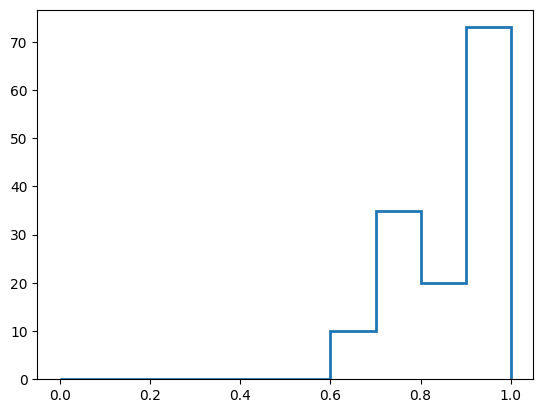

In [50]:
plt.hist(rf_pred_df["preds"], range=(0, 1), bins=10, label='Model', histtype= "step", lw=2)

In [51]:
rf_imperical_df = rf_pred_df.groupby("distance")["target"].agg(["mean","count"])
rf_imperical_df

,mean,count
distance,,
21.0,1.000000,1
23.0,1.000000,4
24.0,1.000000,4
25.0,1.000000,4
26.0,0.666667,3
27.0,1.000000,6
28.0,1.000000,3
29.0,1.000000,4
30.0,1.000000,6


In [52]:
rf_predicted_df = rf_pred_df.groupby("distance")["preds"].agg(["mean","count"])
rf_predicted_df.merge(rf_imperical_df,on= "distance")
rf_predicted_df = rf_predicted_df.merge(rf_imperical_df,on= "distance")

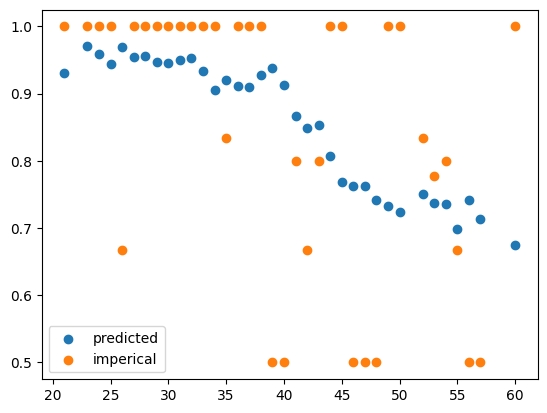

In [53]:
plt.scatter(rf_predicted_df.index.values, rf_predicted_df['mean_x'], label='predicted')
plt.scatter(rf_predicted_df.index.values, rf_predicted_df['mean_y'], label='imperical')
plt.legend()

In [54]:
rf_predicted_df

,mean_x,count_x,mean_y,count_y
distance,,,,
21.0,0.930860,1,1.000000,1
23.0,0.971685,4,1.000000,4
24.0,0.959562,4,1.000000,4
25.0,0.943635,4,1.000000,4
26.0,0.969883,3,0.666667,3
27.0,0.954972,6,1.000000,6
28.0,0.956751,3,1.000000,3
29.0,0.947551,4,1.000000,4
30.0,0.945135,6,1.000000,6


In [55]:
#Edit the below for the random forest model
# typically do not go above 7 for max_depth
#(n_estimators=250, min_samples_leaf=50, max_depth=5)
random_forest2 = RandomForestClassifier()
#create a dictionary of all values we want to test for 
param_grid = {'n_estimators': (50,75,100), 'min_samples_leaf':(10,20,30), 'max_depth':(1,2,3)}
#use gridsearch to test all values for n_neighbors
random_forest2_gscv = GridSearchCV(random_forest2, param_grid, cv=5)
#fit model to data
random_forest2_gscv.fit(X_train, y_train)

C:\Users\AGaev\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\AGaev\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\AGaev\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\AGaev\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConvers

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': (1, 2, 3),
                         'min_samples_leaf': (10, 20, 30),
                         'n_estimators': (50, 75, 100)})

In [56]:
random_forest2_gscv.best_estimator_

RandomForestClassifier(max_depth=1, min_samples_leaf=10, n_estimators=50)

In [57]:
random_forest2_gscv.best_estimator_.n_estimators

50

In [58]:
random_forest2_gscv.best_estimator_.predict_proba(X_train)

array([[0.11495973, 0.88504027],
       [0.11056239, 0.88943761],
       [0.18911294, 0.81088706],
       ...,
       [0.14489453, 0.85510547],
       [0.18879373, 0.81120627],
       [0.11056239, 0.88943761]])

In [59]:
rf2_preds_test = random_forest2_gscv.predict_proba(X_test)
rf2_preds_test

array([[0.10258485, 0.89741515],
       [0.10275504, 0.89724496],
       [0.10258485, 0.89741515],
       [0.10348718, 0.89651282],
       [0.14489453, 0.85510547],
       [0.18969606, 0.81030394],
       [0.10348718, 0.89651282],
       [0.18896393, 0.81103607],
       [0.10275504, 0.89724496],
       [0.10788452, 0.89211548],
       [0.11056239, 0.88943761],
       [0.19677128, 0.80322872],
       [0.18896393, 0.81103607],
       [0.14489453, 0.85510547],
       [0.10718174, 0.89281826],
       [0.10258485, 0.89741515],
       [0.10275504, 0.89724496],
       [0.19677128, 0.80322872],
       [0.10275504, 0.89724496],
       [0.10383116, 0.89616884],
       [0.10348718, 0.89651282],
       [0.10546738, 0.89453262],
       [0.11056239, 0.88943761],
       [0.10275504, 0.89724496],
       [0.19004004, 0.80995996],
       [0.10275504, 0.89724496],
       [0.10258485, 0.89741515],
       [0.19677128, 0.80322872],
       [0.10546738, 0.89453262],
       [0.10383116, 0.89616884],
       [0.

In [60]:
rf2_pred_df = pd.DataFrame({"target":y_test["field_goal_result"], "distance":X_test["kick_distance"], "preds":rf2_preds_test[:,1]})
rf2_pred_df

,target,distance,preds
5595,1,31.0,0.897415
8099,1,33.0,0.897245
102,1,37.0,0.897415
48441,1,29.0,0.896513
41678,1,43.0,0.855105
...,...,...,...
35380,1,33.0,0.897245
13247,1,26.0,0.897415
20556,1,30.0,0.897096
3181,0,43.0,0.855276


In [61]:
rf2_imperical_df = rf2_pred_df.groupby("distance")["target"].agg(["mean","count"])
rf2_imperical_df

,mean,count
distance,,
21.0,1.000000,1
23.0,1.000000,4
24.0,1.000000,4
25.0,1.000000,4
26.0,0.666667,3
27.0,1.000000,6
28.0,1.000000,3
29.0,1.000000,4
30.0,1.000000,6


In [62]:
rf2_predicted_df = rf2_pred_df.groupby("distance")["preds"].agg(["mean","count"])
rf2_predicted_df.merge(rf2_imperical_df,on= "distance")
rf2_predicted_df = rf2_predicted_df.merge(rf2_imperical_df,on= "distance")

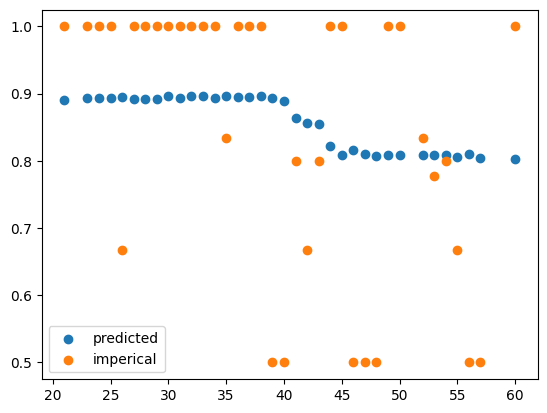

In [63]:
plt.scatter(rf2_predicted_df.index.values, rf2_predicted_df['mean_x'], label='predicted')
plt.scatter(rf2_predicted_df.index.values, rf2_predicted_df['mean_y'], label='imperical')
plt.legend()

In [68]:
#This graph indicates that the model is under fit.

In [64]:
rf2_predicted_df

,mean_x,count_x,mean_y,count_y
distance,,,,
21.0,0.891102,1,1.000000,1
23.0,0.893426,4,1.000000,4
24.0,0.893757,4,1.000000,4
25.0,0.893924,4,1.000000,4
26.0,0.894699,3,0.666667,3
27.0,0.892481,6,1.000000,6
28.0,0.891796,3,1.000000,3
29.0,0.892480,4,1.000000,4
30.0,0.896103,6,1.000000,6


In [65]:
#Calibration curve for the positive event of making a field goal.
fig_list = []
fig = plot_calibration_curve(y_test = y_test, preds = rf2_preds_test)
fig_list.append(fig)

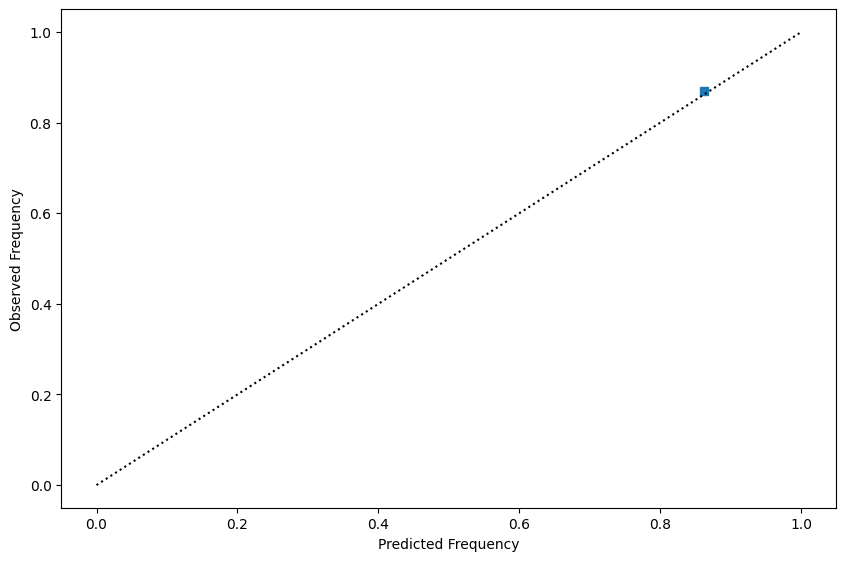

In [66]:
fig

In [ ]:
#Another indication that the model is underfit. It is only predicting in the 80 to 90 range.

In [67]:
log_loss(y_test, rf2_preds_test)

0.364814689479582

In [ ]:
#September: finishing up the portfolio. possibly addding to the 4th down project. Course work
#October: getting resume/cover letters ready for applications, continued course work
#send resume to Pat